In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

from collections import Counter

import nltk

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from sklearn import feature_extraction
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

Import and Omit N/a

In [4]:
fox_ukraine = pd.read_csv (r'C:\Users\zach\foxnewsspiderukraine.csv')
fox_ukraine.dropna(inplace = True)
fox_ukraine.head()

,title,byline,time,content
0,Laura Ingraham: Why is there not any urgency f...,Fox News Staff,"March 17, 2022 12:08am EDT",close Video Ingraham: GOP members fur...
1,US Senate approves resolution to probe Putin f...,Associated Press,"March 16, 2022 2:15pm EDT",close Video Fox News Flash top headlin...
2,Ukraine's Zelenskyy gave a powerful address to...,James Jay Carafano,"March 16, 2022 3:25pm EDT",close Video Sen. Cotton: Zelenkyy's ad...
3,Ukraine zookeeper fears hundreds of animals wi...,David Rutz,"March 16, 2022 3:43pm EDT",close Video Putin to be held accountab...
4,"Biden approves more anti-aircraft systems, dro...",Brooke Singman,"March 16, 2022 2:28pm EDT",close Video Ukrainian President Volody...


In [5]:
fox_ukraine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 785
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    782 non-null    object
 1   byline   782 non-null    object
 2   time     782 non-null    object
 3   content  782 non-null    object
dtypes: object(4)
memory usage: 30.5+ KB


Formatting Dates

In [6]:
fox_ukraine.columns

Index(['title', 'byline', 'time', 'content'], dtype='object')

In [7]:
fox_ukraine = fox_ukraine.rename(columns = {'time':'date'})
fox_ukraine.date = fox_ukraine.date.apply(lambda x: x.strip())
fox_ukraine['date'] = pd.to_datetime(fox_ukraine['date'])

fox_ukraine.head()

C:\Users\zach\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\zach\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,title,byline,date,content
0,Laura Ingraham: Why is there not any urgency f...,Fox News Staff,2022-03-17 00:08:00,close Video Ingraham: GOP members fur...
1,US Senate approves resolution to probe Putin f...,Associated Press,2022-03-16 14:15:00,close Video Fox News Flash top headlin...
2,Ukraine's Zelenskyy gave a powerful address to...,James Jay Carafano,2022-03-16 15:25:00,close Video Sen. Cotton: Zelenkyy's ad...
3,Ukraine zookeeper fears hundreds of animals wi...,David Rutz,2022-03-16 15:43:00,close Video Putin to be held accountab...
4,"Biden approves more anti-aircraft systems, dro...",Brooke Singman,2022-03-16 14:28:00,close Video Ukrainian President Volody...


Cleaning articles of unessecary content like embedded javascript, etc.

In [84]:
fox_ukraine['content'] = fox_ukraine['content'].apply(lambda x: x.lower())
fox_ukraine.content = fox_ukraine.content.apply(lambda x: re.sub(r'use\sstrict.*?env=prod"}', '', x))

Adding month_year column

In [8]:
fox_ukraine['month_year'] = pd.to_datetime(fox_ukraine['date']).dt.to_period('M')
fox_ukraine.head()

,title,byline,date,content,month_year
0,Laura Ingraham: Why is there not any urgency f...,Fox News Staff,2022-03-17 00:08:00,close Video Ingraham: GOP members fur...,2022-03
1,US Senate approves resolution to probe Putin f...,Associated Press,2022-03-16 14:15:00,close Video Fox News Flash top headlin...,2022-03
2,Ukraine's Zelenskyy gave a powerful address to...,James Jay Carafano,2022-03-16 15:25:00,close Video Sen. Cotton: Zelenkyy's ad...,2022-03
3,Ukraine zookeeper fears hundreds of animals wi...,David Rutz,2022-03-16 15:43:00,close Video Putin to be held accountab...,2022-03
4,"Biden approves more anti-aircraft systems, dro...",Brooke Singman,2022-03-16 14:28:00,close Video Ukrainian President Volody...,2022-03


Checking month day ocurrences for making the timeframes the same between datasets

Text(0, 0.5, 'count')

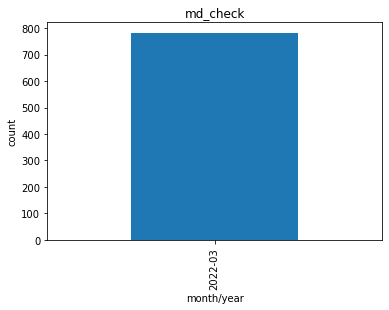

In [10]:
md_check = fox_ukraine['month_year'].value_counts().plot(kind='bar')
md_check.set_title("md_check")
md_check.set_xlabel("month/year")
md_check.set_ylabel("count")

setting the index to the month_year column

In [106]:
fox_ukraine.set_index('month_year').head()

,title,byline,date,content
month_year,,,,
2022-03,COVID loneliness crisis – here's how you can f...,"Nicole Saphier, M.D.",2022-03-15 14:00:00,close video cdc has done a ‘disservice...
2022-03,Republicans go for kill shot on COVID transpor...,Tyler Olson,2022-03-15 14:09:00,close video fox news flash top headlin...
2022-03,10 biggest COVID mistakes – Americans deserve ...,Dr. Marty Makary,2022-03-16 05:00:00,close video dr. makary: covid virus 'b...
2022-03,Lara Trump slams Biden for mask mandates based...,Fox News Staff,2022-03-16 08:23:00,close video lara trump rips biden for ...
2022-03,"Novak Djokovic, Russian players expected to co...",Associated Press,2022-03-16 09:39:00,close video fox news flash top headlin...


selecting dates to makes timeframes in datasets equal

In [11]:
fox_ukraine_cleaned = fox_ukraine[fox_ukraine['month_year'].between('2021-12', '2022-03')].copy()
fox_ukraine_cleaned.head()

,title,byline,date,content,month_year
0,Laura Ingraham: Why is there not any urgency f...,Fox News Staff,2022-03-17 00:08:00,close Video Ingraham: GOP members fur...,2022-03
1,US Senate approves resolution to probe Putin f...,Associated Press,2022-03-16 14:15:00,close Video Fox News Flash top headlin...,2022-03
2,Ukraine's Zelenskyy gave a powerful address to...,James Jay Carafano,2022-03-16 15:25:00,close Video Sen. Cotton: Zelenkyy's ad...,2022-03
3,Ukraine zookeeper fears hundreds of animals wi...,David Rutz,2022-03-16 15:43:00,close Video Putin to be held accountab...,2022-03
4,"Biden approves more anti-aircraft systems, dro...",Brooke Singman,2022-03-16 14:28:00,close Video Ukrainian President Volody...,2022-03


Exporting cleaned data to join with other foxnews data to make wordclouds

In [15]:
fox_ukraine_cleaned.to_csv (r'C:\Users\zach\fox_ukraine_cleaned.csv', header=True)

Verifying the correct period of time was selected

Text(0, 0.5, 'count')

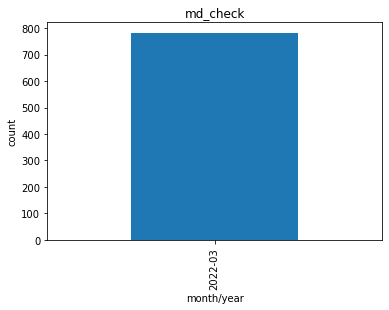

In [13]:
md_check2 = fox_ukraine_cleaned['month_year'].value_counts().plot(kind='bar')
md_check2.set_title("md_check")
md_check2.set_xlabel("month/year")
md_check2.set_ylabel("count")